
 ⚡⚡⚡
1. A clear and logical project structure. 
- Overview/Exec summary 
 
- Data cleaning + transformation 
 
- EDA/Analysis 
 
- Recommendations 
 
2. Focus more on the analysis than the tool. 
 
3. Keep it short and concise. 
  
4. Consider data visualisation. 


# Time Series Modeling: Romanian Electricity

## Overview
- This project will attempt to build an ARIMA model on hourly electricity consumption and production rates for Romania from 2019 to mid-March 2023.

Analysis will attempt manual and auto-ARIMA derivations of 

- **P**: lag order (AutoRegressive Component - AR)
- **D**: degree of differencing (Integragtion Component - I)
- **Q**: order of the moving average (Moving Average Component - MA)
---

[Data Source](https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production)

Table Data
All values in MegaWatts (MW)

| Fields | Interpretation | Example |
| --- | --- | --- |
| DateTime | Hourly Timestamp | 1/1/2019  7:00:00 AM |
| Consumption | Total Romanian Energy Consumption (MW) | 5524 |
| Production | Total Romanian Energy Production (MW) | 5547 |
| Nuclear | Total Romanian Nuclear Energy Consumption (MW) | 1392 |
| Wind | Total Romanian Wind Energy Production (MW) | 93 |
| Hydroelectric | Total Romanian Hydroelectric Energy Production (MW) | 1187 |
| Oil and Gas | Total Romanian Oil and Gas Energy Production (MW) | 1446 |
| Coal | Total Romanian Coal Energy Production (MW) | 1394 |
| Solar | Total Romanian Solar Energy Production (MW) | 0 |
| Biomass | Total Romanian Biomass Energy Production (MW) | 34 |

## Overview / Executive Summary

In [21]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os
import matplotlib.pyplot as plt

#Load the CSV file as dataframe, df
os.chdir(r"C:\Users\Public\Documents")
df = pd.read_csv("electricityConsumptionAndProductioction.csv")

# Confirm loading CSV
# Look at the dataframe structure

print(df.info())
print(df.describe())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB
None
        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  36772.000000  36772.000000  36772.000000  36772.000000   36772.000000   
mean    6707.924889   6543.770478   1293.468590    785.700723    1801.603149   
std     1034.961146   1005.486125    237.348752    681.508967     678.981785   


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


## Data Cleaning & Transformation
- I trust that outliers are real due to national level monitoring systems

1. Check for duplicates and missing values
     - Time series data cannot have missing values
     - Initial glimpse at data above suggests no missing values (36,772 values across all fields)
2. Convert DateTime to a timestamp data type
   - Potentially Aggregate into daily averages depending on computing power

In [22]:
# Check for any missing values
df.isnull().values.any()

False

In [23]:
# No missing records

# Check for any Duplicates
df.duplicated().values.any()

True

In [24]:
# Identify duplicates
df[df.duplicated()]

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
7180,2019-10-27 03:00:00,5196,4459,1373,74,725,719,1515,0,50
15917,2020-10-25 03:00:00,5220,5412,1418,1188,1098,594,1048,0,65
24822,2021-10-31 03:00:00,5341,5258,1415,141,934,1314,1393,0,58
33559,2022-10-30 03:00:00,4503,5269,1384,544,1289,924,1073,0,52


In [25]:
# 4 duplicate records
# Drop duplicates, keep one record
df.drop_duplicates(inplace = True)

# Check for any Duplicates
df.duplicated().values.any()

False

In [26]:
# Conver DateTime to datetime datatype
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'].dtype

dtype('<M8[ns]')

In [27]:
# Concerned, I check for duplicate time stamps
df[df['DateTime'].duplicated()]

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
7179,2019-10-27 03:00:00,5196,4459,1373,74,725,719,1515,0,50
15916,2020-10-25 03:00:00,5220,5412,1418,1188,1098,594,1048,0,65
24821,2021-10-31 03:00:00,5341,5258,1415,141,934,1314,1393,0,58
33558,2022-10-30 03:00:00,4503,5269,1384,544,1289,924,1073,0,52


In [28]:
# Observe a timestamp duplicate
df[df['DateTime'] == '2019-10-27 03:00:00']


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
7178,2019-10-27 03:00:00,5186,4478,1373,77,750,696,1532,0,49
7179,2019-10-27 03:00:00,5196,4459,1373,74,725,719,1515,0,50


In [29]:
# Values are close, I will aggregate by hourly average
#Index by timestampe
df.set_index('DateTime', inplace = True)


#Aggregate by hourly average
df_clean = df.groupby(df.index.to_series()).mean()

In [30]:
# Set to hourly period
df_clean.index.to_period('H')
#observe the cleaned df
df_clean.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352.0,6527.0,1395.0,79.0,1383.0,1896.0,1744.0,0.0,30.0
2019-01-01 01:00:00,6116.0,5701.0,1393.0,96.0,1112.0,1429.0,1641.0,0.0,30.0
2019-01-01 02:00:00,5873.0,5676.0,1393.0,142.0,1030.0,1465.0,1616.0,0.0,30.0
2019-01-01 03:00:00,5682.0,5603.0,1397.0,191.0,972.0,1455.0,1558.0,0.0,30.0
2019-01-01 04:00:00,5557.0,5454.0,1393.0,159.0,960.0,1454.0,1458.0,0.0,30.0


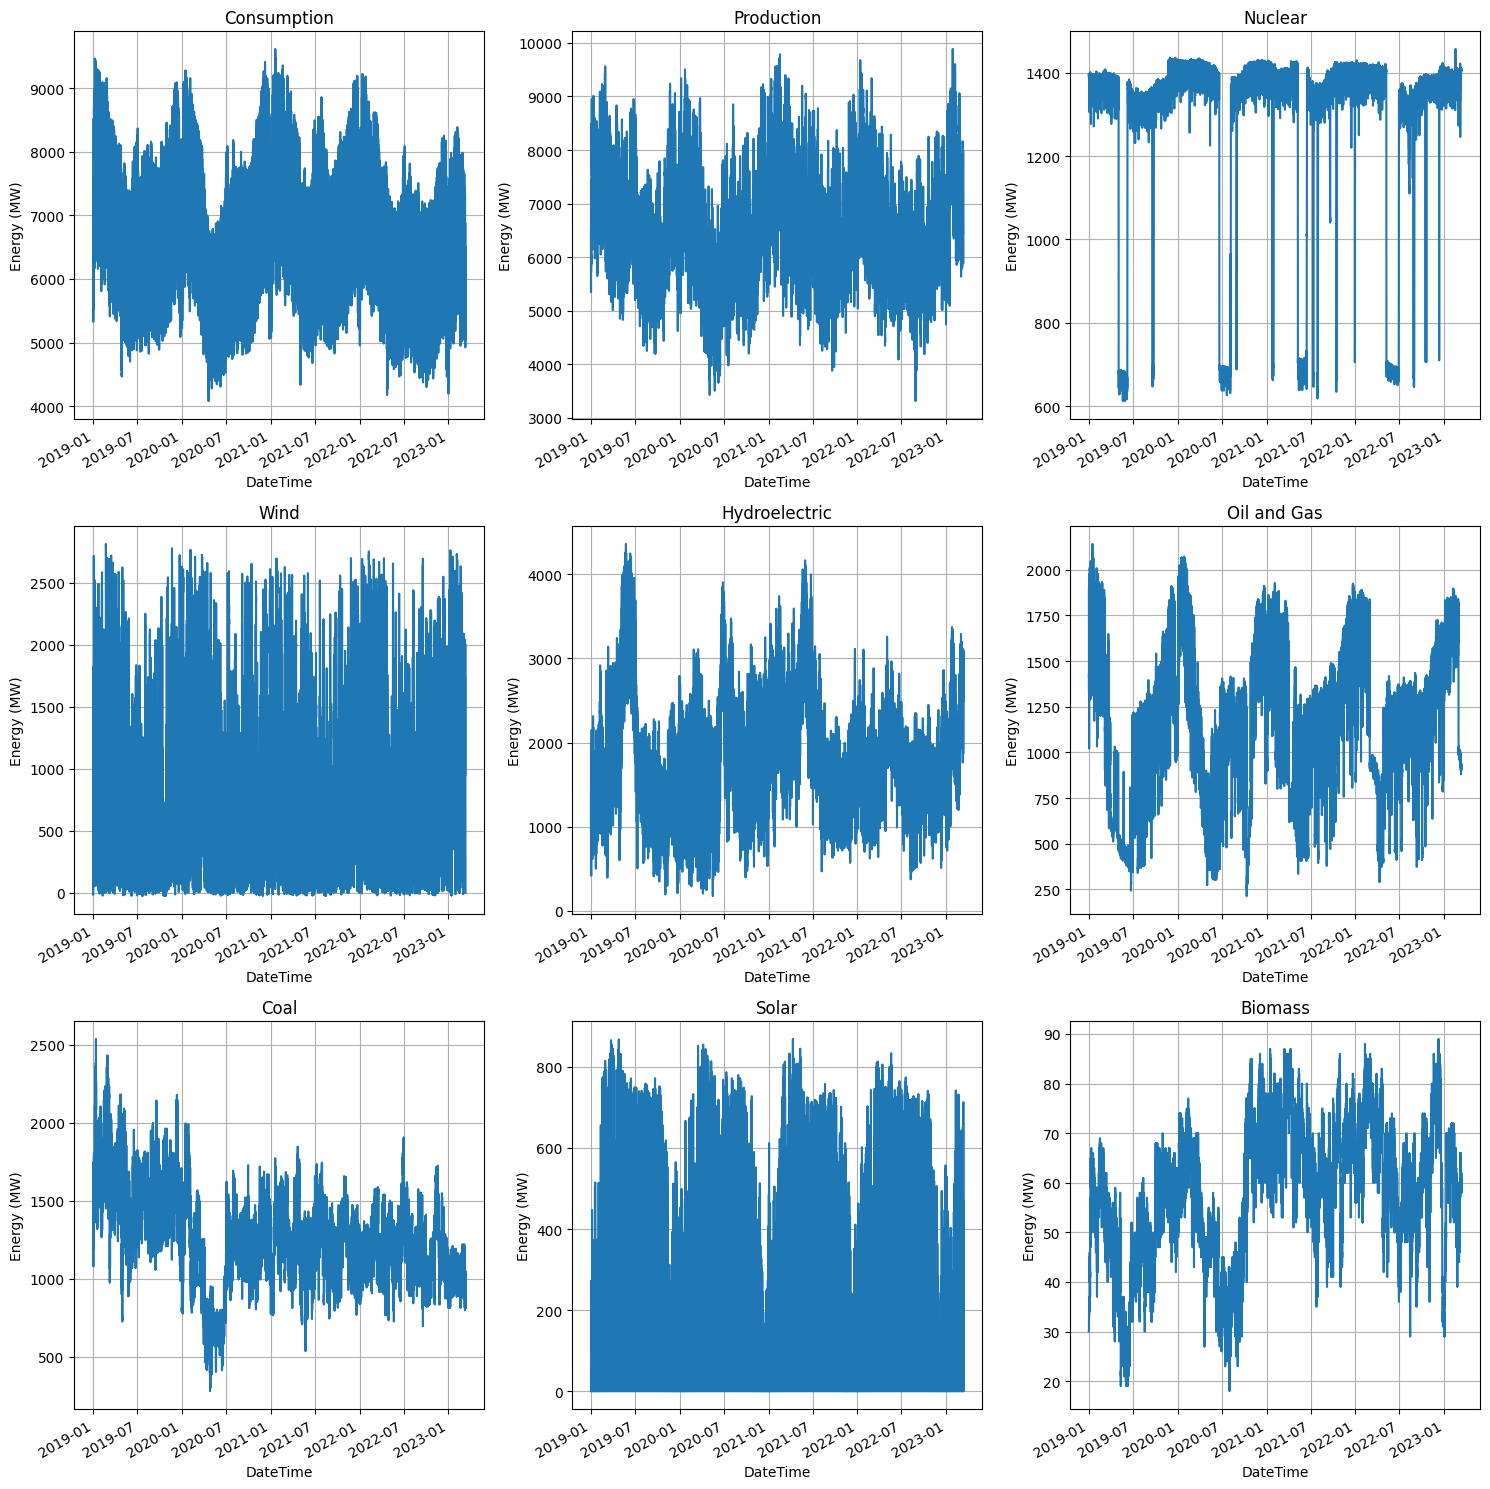

In [31]:
# Plot Romainian Energy 
fig,axs = plt.subplots(3,3, figsize = (15,15))

columns_to_plot = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Iterate over the columns and plot each one on a separate subplot
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    df_clean[column].plot(grid=True, ax=ax)
    ax.set_title(column)
axs[0,0].set_ylabel('Energy (MW)')
axs[0,1].set_ylabel('Energy (MW)')
axs[0,2].set_ylabel('Energy (MW)')
axs[1,0].set_ylabel('Energy (MW)')
axs[1,1].set_ylabel('Energy (MW)')
axs[1,2].set_ylabel('Energy (MW)')
axs[2,0].set_ylabel('Energy (MW)')
axs[2,1].set_ylabel('Energy (MW)')
axs[2,2].set_ylabel('Energy (MW)')

fig.tight_layout()


### Data Cleaning Complete
- Duplicates Removed
- Duplicates by timestamp have been averaged
- DateTime column is converted to Timestamp

## Model Development
### Time Series Assumptions
- Stationarity
  - Normally distributed
  - Mean and variance are constant over time
  - No trends
  - Constant variance and autocorrelation
- Radnomly distributed Error Term
- No Outliers
- Residuals are **not** autocorrelated

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf, acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Check stationarity
results = adfuller(df_clean['Consumption'])

print('Test Statistics: ', results[0])
print('p-value: ', results[1])
print('# of lags: ', results[2])
print('Crticial Values: ', results[4])

# p-value is <0.05 on non differenced data
# I = 0

Test Statistics:  -14.005942892084041
p-value:  3.788198145453762e-26
# of lags:  53
Crticial Values:  {'1%': -3.430528146481028, '5%': -2.861618736457808, '10%': -2.566811908921783}


In [ ]:
# Check stationarity
if results[1]<= 0.05:
    print('Reject null hypothesis, the time series is stationarity')
else:
    print("Fail to reject null hypothesis, the time series in not stationary")

Reject null hypothesis, the time series is stationarity


In [33]:
# Spit data for holdout testing
print(round(0.7*df_clean.shape[0]) + round(0.3*df_clean.shape[0]) == df_clean.shape[0])
train = df_clean.iloc[:-round(0.3*df_clean.shape[0])]    # take out the last 30% of the data
test = df_clean.iloc[-round(0.3*df_clean.shape[0]):] # include the last 30% of the data 
print(train.shape, test.shape)

True
(25735, 9) (11029, 9)


# Progress Bar
---
Notes to self
- INDEX needs a frequency (hourly)
- Seasonality
- Trends
- Decomposition
- Periodogram
- Residual Spectral Density

- Forecasting
- Accuracy Metric? AIC

In [41]:
# Run an ARIMA model
model = ARIMA(train['Consumption'], order = (0,0,0))
model = model.fit()
model.summary

# need frequency info in the model

C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                25735
Model:                          ARIMA   Log Likelihood             -332942.909
Date:                Fri, 08 Mar 2024   AIC                         665889.819
Time:                        16:52:09   BIC                         665906.130
Sample:                             0   HQIC                        665895.091
                              - 25735                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6798.4076   1.66e+05      0.041      0.967   -3.18e+05    3.32e+05
sigma2      2.748e+10   3.43e+08     80.208      0.000    2.68e+10    2.82e+10
===================================================================================
Ljung-Box (L1) (Q):               23693.67   Jarque-Bera (JB):               571.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Make predictions
start = len(train)
end = len(train)+len(test)-1
pred=model.predict(start=start, end=end, type='levels')
print(pred)

# set an index for plotting
pred.index=df.index[start:end+1]

25735    6798.407636
25736    6798.407636
25737    6798.407636
25738    6798.407636
25739    6798.407636
            ...     
36759    6798.407636
36760    6798.407636
36761    6798.407636
36762    6798.407636
36763    6798.407636
Name: predicted_mean, Length: 11029, dtype: float64


C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeE

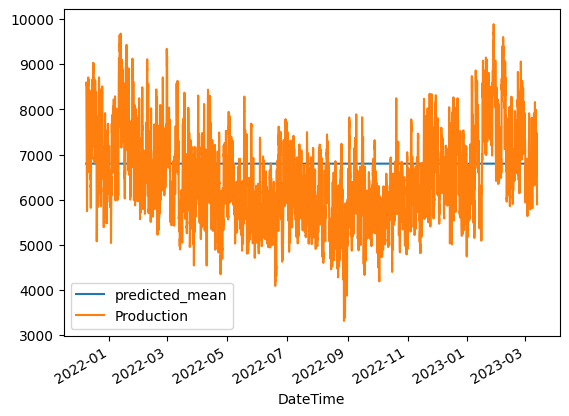

In [44]:
pred.plot(legend=True)
test['Production'].plot(legend = True)
plt.show()

In [47]:
# RMSE accuracy metric
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['Production']))
print(rmse)

1026.067791022235


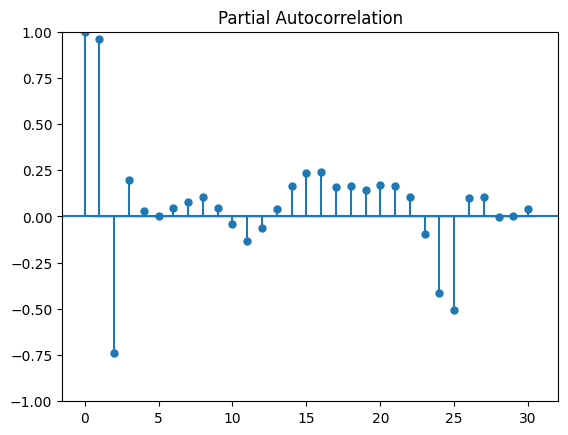

In [37]:
plot_pacf(df_clean['Consumption'], lags=30)
plt.show()
# P = 0

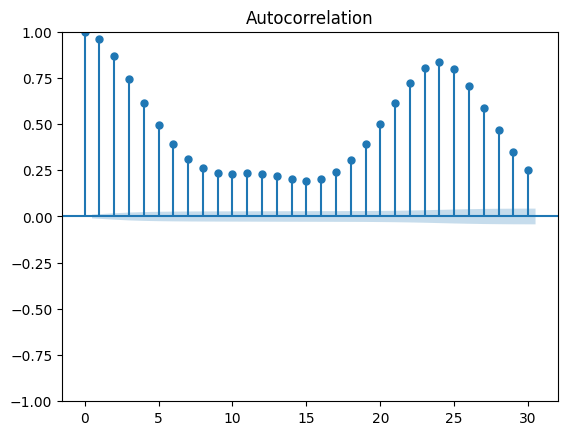

In [38]:
plot_acf(df_clean['Consumption'], lags=30)
plt.show()
#Q = 0

In [39]:
acf(df_clean['Production'])

array([1.        , 0.97459715, 0.92568128, 0.8644082 , 0.79866702,
       0.73362956, 0.67294487, 0.62030276, 0.57795106, 0.54827514,
       0.5280185 , 0.51325966, 0.50013205, 0.48737462, 0.47617408,
       0.47038115, 0.4743103 , 0.49169048, 0.51968062, 0.55566308,
       0.59592826, 0.63730795, 0.67549194, 0.70340588, 0.71148709,
       0.68925863, 0.64767748, 0.59588802, 0.54132359, 0.48809023,
       0.43938746, 0.39872171, 0.36759873, 0.34763494, 0.33616664,
       0.32923738, 0.32308349, 0.31667647, 0.31126203, 0.31042854,
       0.31835786, 0.33840275, 0.36825451, 0.40612722, 0.44833086,
       0.49133281])

## Auto-ARIMA

In [40]:
# pip install pmdarima
# Will re-evalute, wanted the syntax
from pmdarima.arima import auto_arima
model = auto_arima(df_clean['Production'], trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [ ]:
forecast = model.predict(n_periods=365)

C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\raven\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


NameError: name 'forecast' is not defined

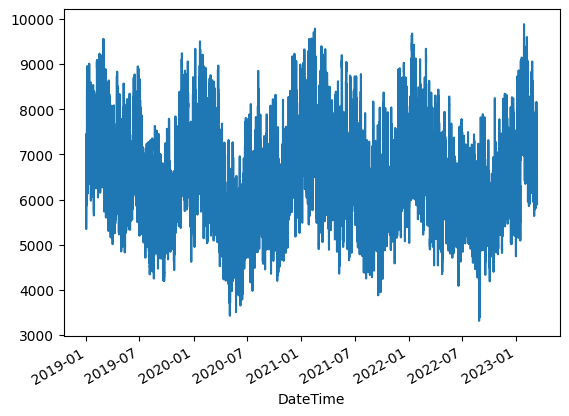

In [ ]:
df_clean['Production'].plot()
forecast.plot()
plt.show()

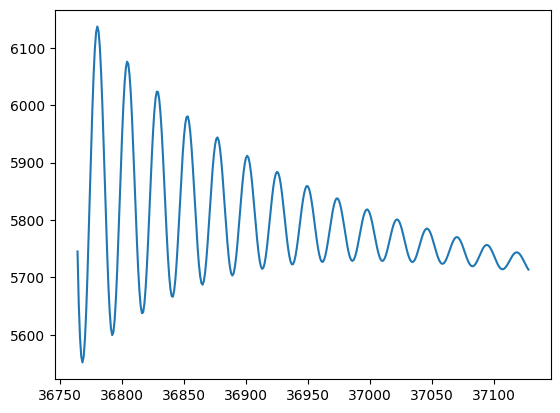

In [ ]:
# Something strange in Auto ARIMA. Small variance and reversion to the mean
forecast.plot()
plt.show()

## Reccomendations